In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/.local/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [3]:
mun_schema = 'metropolis'
mun_folder = 'metro_list'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


In [4]:
cvegeo_list = list(mun_gdf.loc[mun_gdf.city==city]["CVEGEO"].unique())

In [7]:
# donwload hexagons with pop data
hex_pop = gpd.GeoDataFrame()
hex_folder = 'hex_bins_pop_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_pop = pd.concat([hex_pop, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_pop.shape)
hex_pop.head(2)

(1187, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,135.64044,137.528090,13.123595,6.831461,6.292135,260.044950,...,13.662921,66.06741,34.426968,56.808990,9.168539,7.011236,2.067416,4.134831,33.348316,0.539326
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,98.333336,46.00000,43.333332,4.666666,2.333333,2.333333,84.666664,...,3.000000,22.00000,11.000000,18.666666,3.000000,2.000000,0.000000,0.000000,9.333333,0.000000


In [9]:
# donwload hexagons with pop data
hex_idx = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
hex_schema = 'processed'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_idx = pd.concat([hex_idx, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_idx.shape)
hex_idx.head(2)

(2969, 19)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados
0,0.000157,0.000473,5.887650e-24,2.189688e-23,5,0.000787,0.002364,2.943825e-23,1.094844e-22,4.657651e-09,1.398694e-08,1.742094e-28,6.479058e-28,"POLYGON ((-103.54324 20.40862, -103.54269 20.4...",8849aa2611fffff,14002,9041.266800,9983.789800,9250.494800
1,0.000343,0.001031,1.124020e-21,4.180368e-21,12,0.004118,0.012368,1.348825e-20,5.016442e-20,2.437182e-08,7.318864e-08,7.982061e-26,2.968625e-25,"POLYGON ((-103.54722 20.40036, -103.54269 20.4...",8849aa261bfffff,14002,8371.216417,9313.739417,8580.444417


In [10]:
hex_pop_filter = hex_pop[['hex_id_8','pobtot','geometry']].copy()
hex_idx_filter = hex_idx[['hex_id_8','dist_supermercados']]

In [59]:
hex_analysis = hex_pop_filter.merge(hex_idx_filter, on='hex_id_8', how='left')
print(hex_analysis.shape)
hex_analysis.head(4)

(1187, 4)


,hex_id_8,pobtot,geometry,dist_supermercados
0,8849abc9ebfffff,273.168550,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",1786.589800
1,8849abc9e3fffff,98.333336,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",2635.459812
2,8849abc999fffff,60.000000,"POLYGON ((-103.64928 20.44809, -103.65381 20.4...",1507.095889
3,8849abc9e7fffff,1247.971700,"POLYGON ((-103.59961 20.43722, -103.60414 20.4...",856.580944


In [60]:
idx = hex_analysis.dist_supermercados.isna()
hex_analysis = hex_analysis.loc[~idx]

In [75]:
sns.set_style("darkgrid")

(-103.6846859853608,
 -103.00535604172013,
 20.30522620534624,
 20.895293154199003)

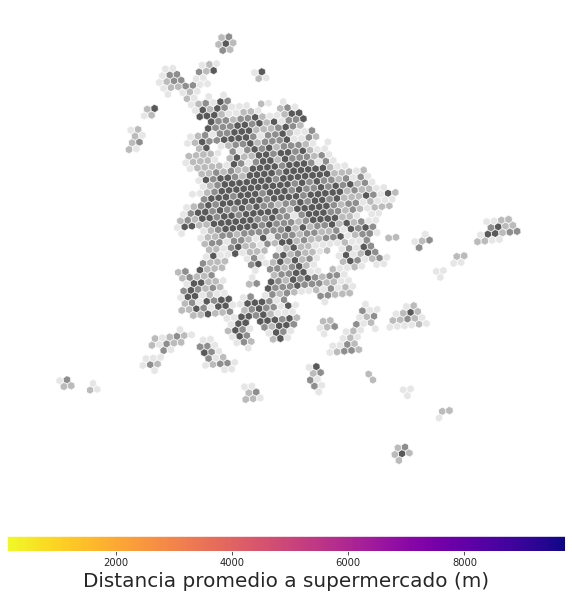

In [78]:
fig, axes = plt.subplots(2,1,figsize=(10,10), gridspec_kw={"height_ratios":[0.96, 0.03]})

hex_analysis.plot('dist_supermercados', cmap='Greys_r', alpha=0.65, scheme='Quantiles', ax=axes[0])

hex_analysis.plot(ax=ax, zorder=2,  column='dist_supermercados', alpha=0.5, cax=axes[1],legend=True, 
                  cmap='plasma_r', legend_kwds={'label': "Distancia a supermercado (m)", 'orientation': "horizontal"})

axes[1].set_xlabel(f'Distancia promedio a supermercado (m)',fontsize=20)

axes[0].axis('off')

In [62]:
hex_analysis = hex_analysis.sort_values(by='dist_supermercados')

In [66]:
hex_analysis['sum_pobtot'] = hex_analysis['pobtot'].cumsum()
hex_analysis.head(4)

,hex_id_8,pobtot,geometry,dist_supermercados,sum_pobtot
571,8849ab5a6dfffff,3623.5571,"POLYGON ((-103.47498 20.54379, -103.47951 20.5...",129.755331,3623.5571
115,88498c945bfffff,2854.9175,"POLYGON ((-103.34272 20.67198, -103.33818 20.6...",134.031569,6478.4746
1078,8849ab59c7fffff,7537.6294,"POLYGON ((-103.44287 20.65447, -103.43834 20.6...",142.573244,14016.1040
170,88498c96e7fffff,3190.9668,"POLYGON ((-103.34833 20.67931, -103.35341 20.6...",150.383674,17207.0708


[Text(-200.0, 0, ''),
 Text(0.0, 0, ''),
 Text(200.0, 0, ''),
 Text(400.0, 0, ''),
 Text(600.0, 0, ''),
 Text(800.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1200.0, 0, ''),
 Text(1400.0, 0, '')]

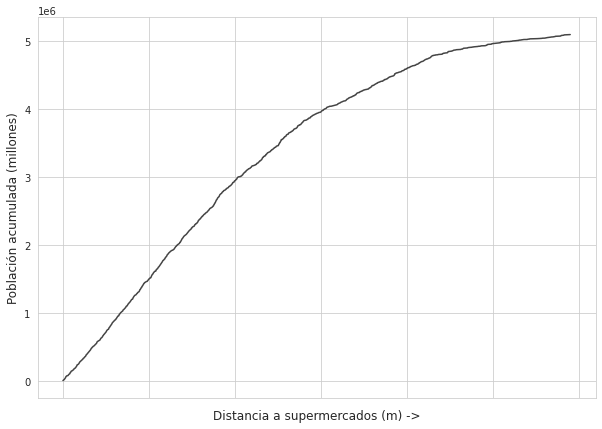

In [72]:
fig,ax = plt.subplots(figsize=(10,7))

hex_analysis.reset_index(inplace=True)
hex_analysis.drop(columns=['index'], inplace=True)
hex_analysis.sum_pobtot.plot(color='#444444', ax=ax)

plt.ylabel('Población acumulada (millones)', fontsize=12)
ax.set_xlabel('Distancia a supermercados (m) ->', fontsize=12)
ax.set_xticklabels([])